In [ ]:
from importlib import reload
import pandas as pd
import visualisation
reload(visualisation)
from visualisation import multivariate_density

In [ ]:
import pickle
with open("DATA.pkl", "rb") as f:
    DATA = pickle.load(f)

metadata = {
    "series_id": list(map(lambda x: x['seriesId'][0], DATA)),
    "description": list(map(lambda x: x['seriesDescription'][0], DATA)),
    "unit": list(map(lambda x: x['unit'][0], DATA)),
    "n_observations": list(map(lambda x: x.shape[0], DATA)),
    }

In [ ]:
metadata = pd.DataFrame(metadata)
metadata

In [ ]:
from functools import reduce
def fold_join(df1, df2):
    df2 = df2.rename(columns={'value':  df2['seriesDescription'][0]})
    return pd.merge(df1, df2[['period', df2['seriesDescription'][0]]], on='period')
# Perform the fold join operation using reduce
final_df = reduce(fold_join, DATA)
final_df = final_df.set_index('period').rename(columns={'value': DATA[0]['seriesDescription'][0]}).drop(['seriesDescription','seriesId','unit'], axis=1).sort_index()


In [ ]:
from itertools import combinations
pairs = list(combinations(final_df.columns, 2))

In [ ]:
corr_matrix = final_df.corr().abs()
mask = (corr_matrix > 0.4) & (corr_matrix < 1.0)
high_correlations = []
for col in mask.columns:
        correlated_cols = mask.index[mask[col]]
        for correlated_col in correlated_cols:
            if correlated_col != col:
                high_correlations.append((col, correlated_col))

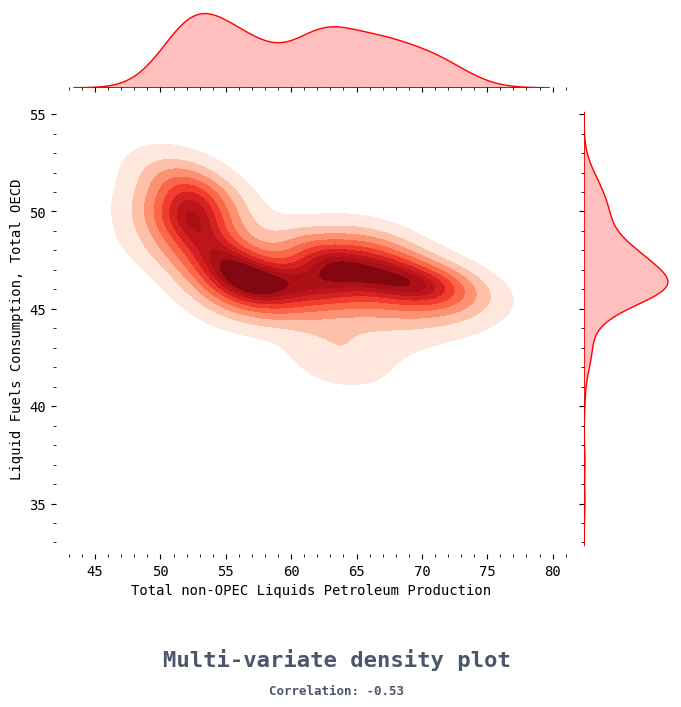

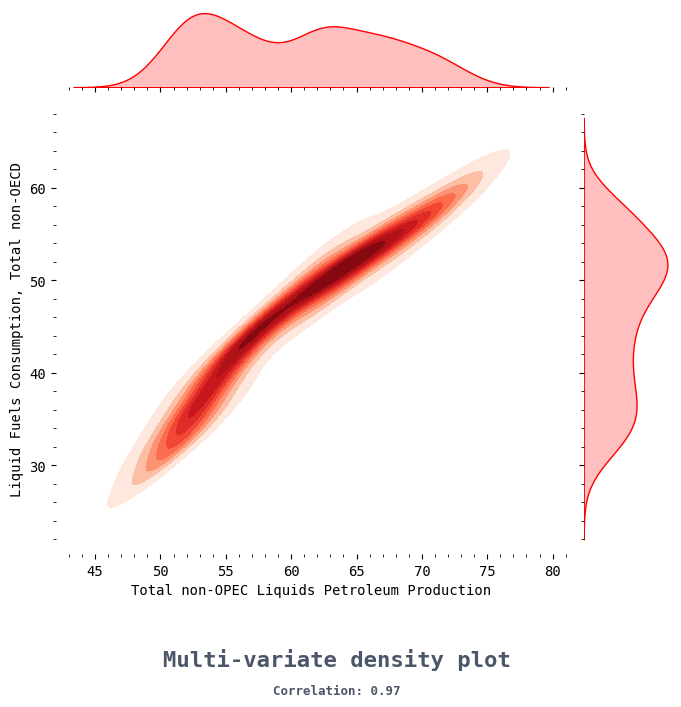

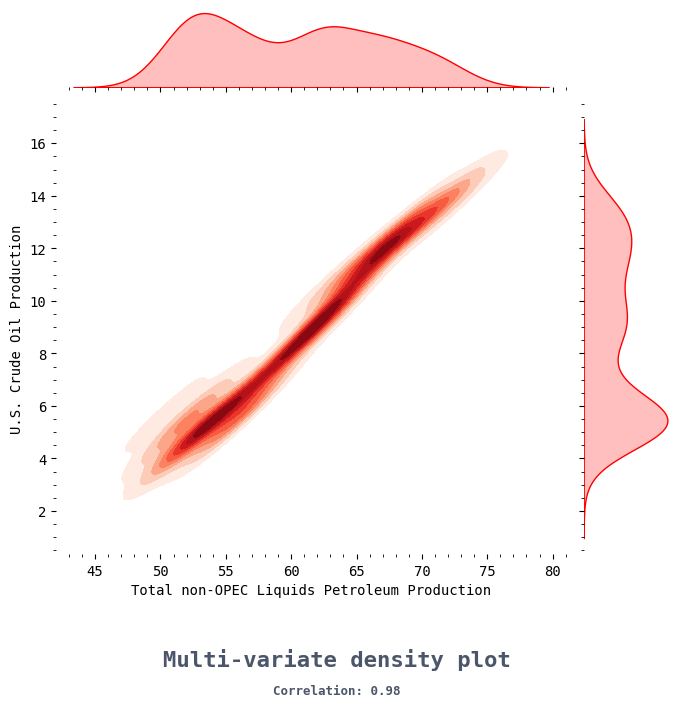

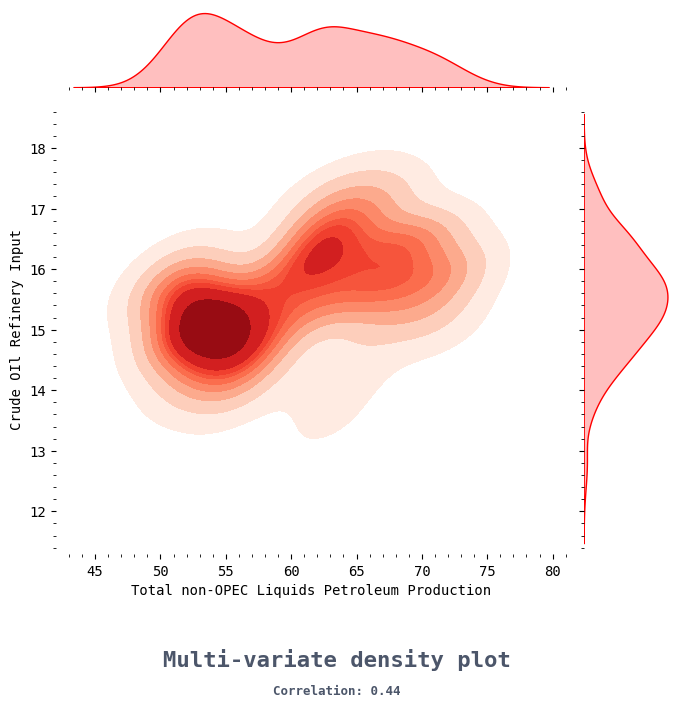

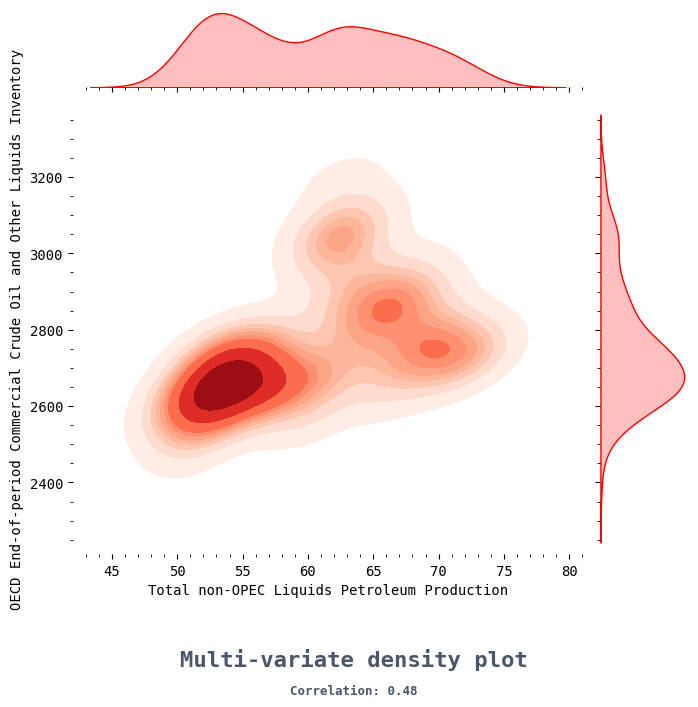

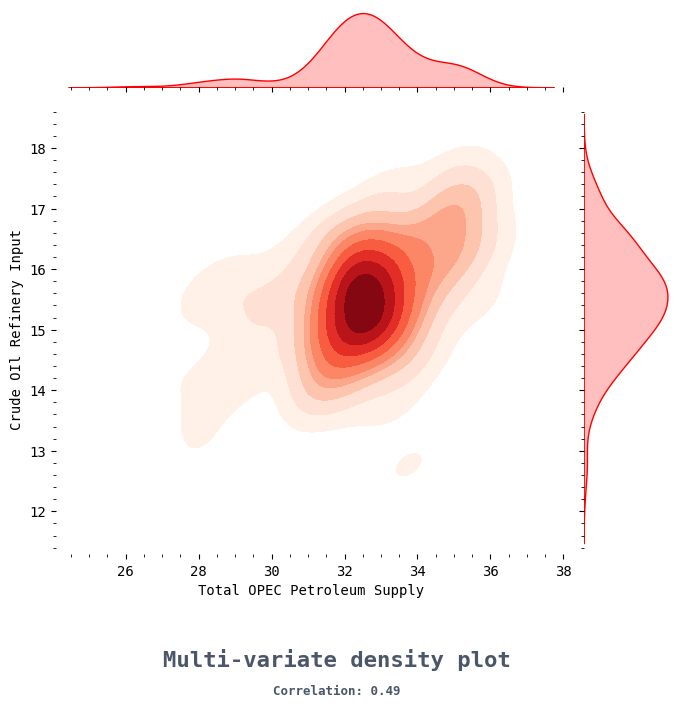

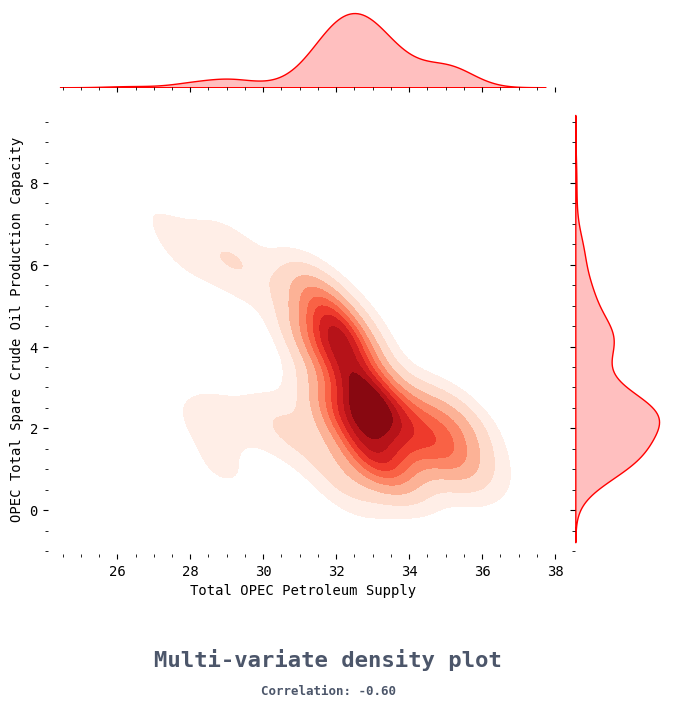

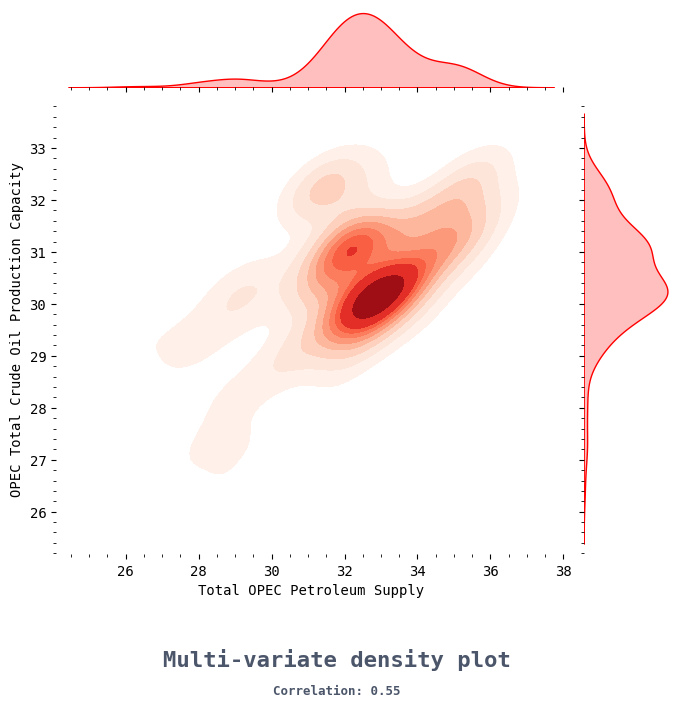

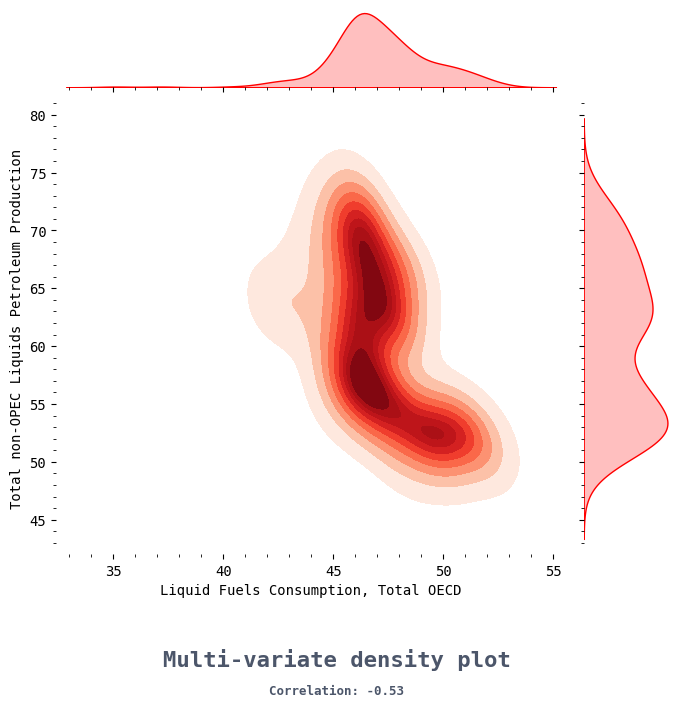

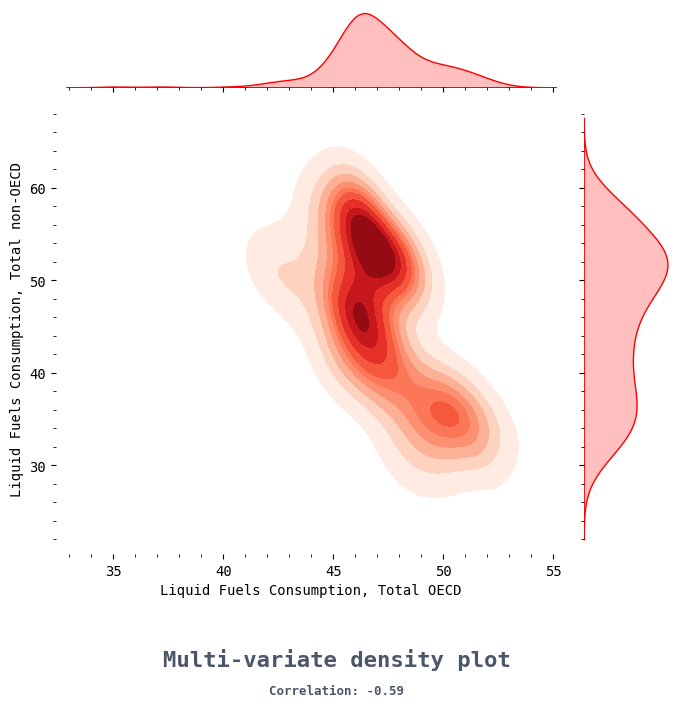

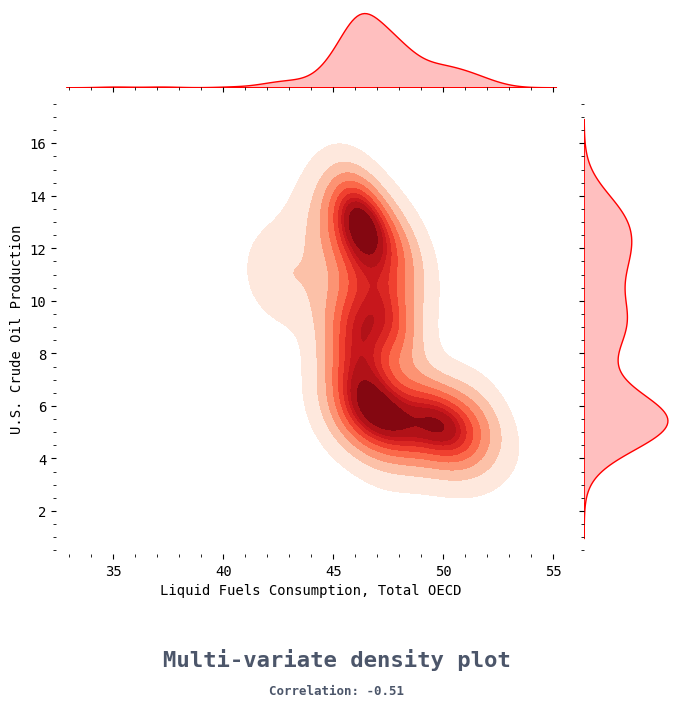

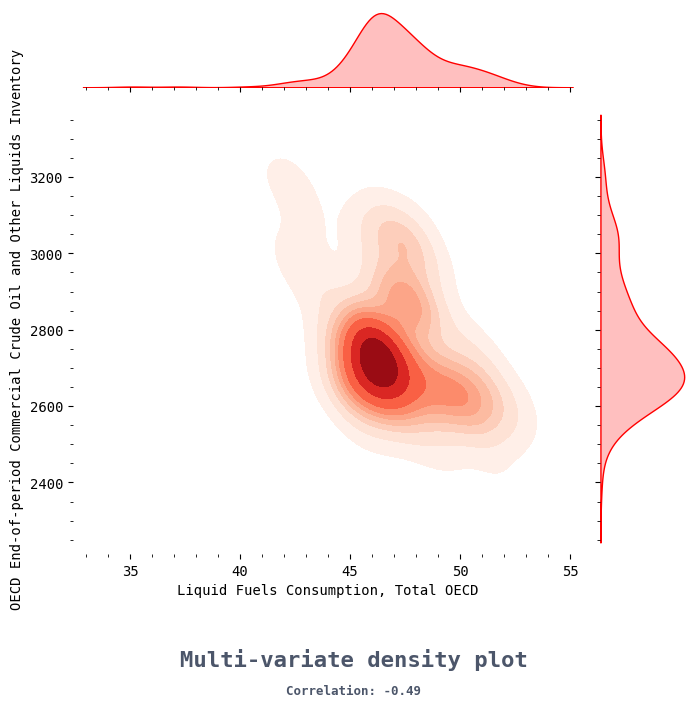

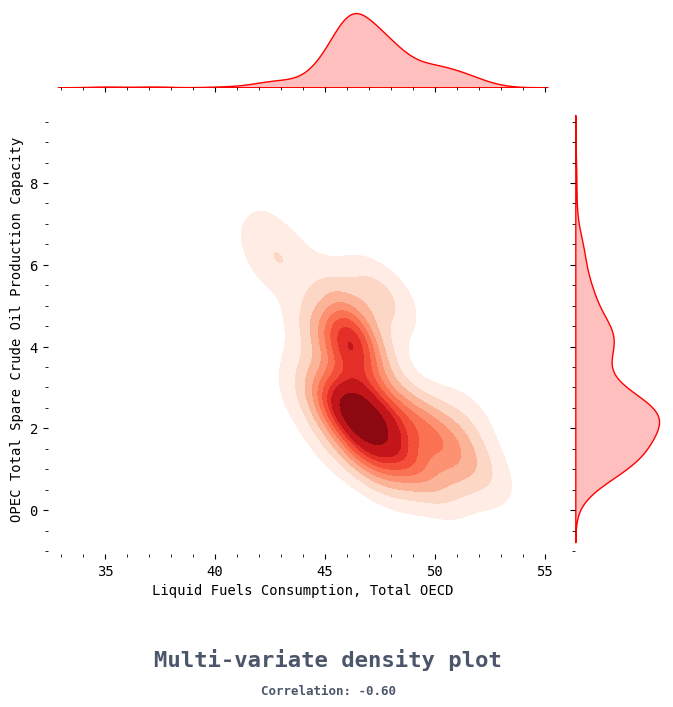

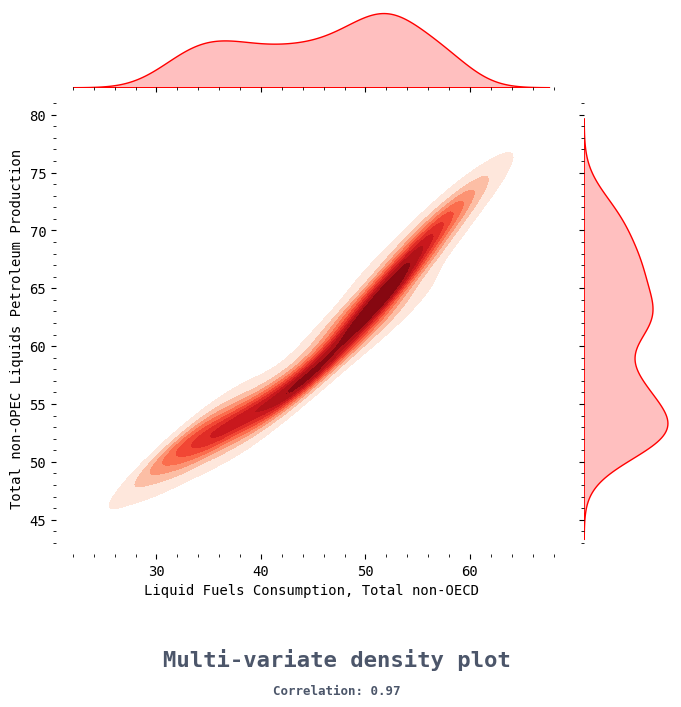

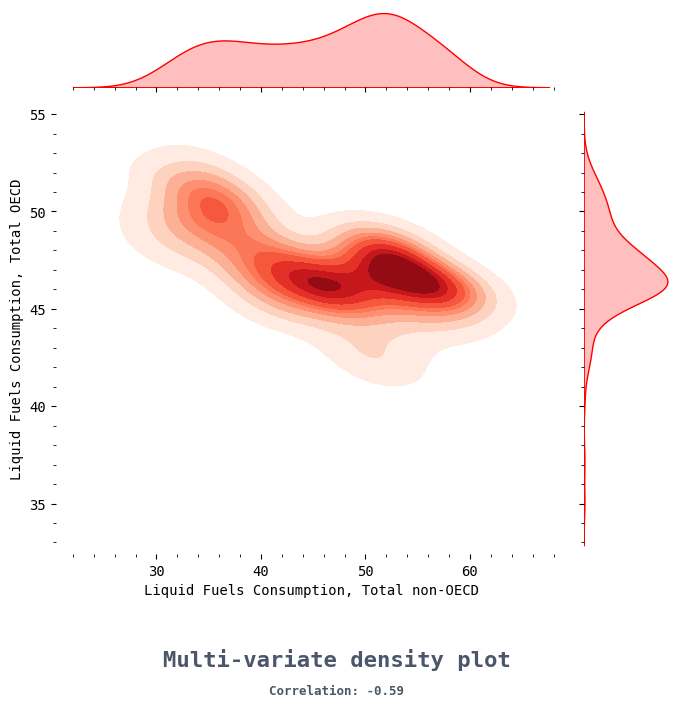

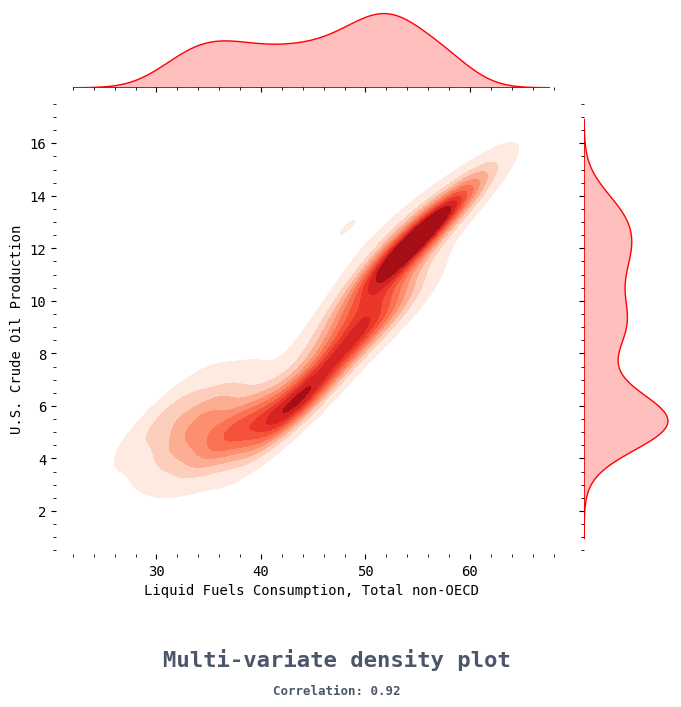

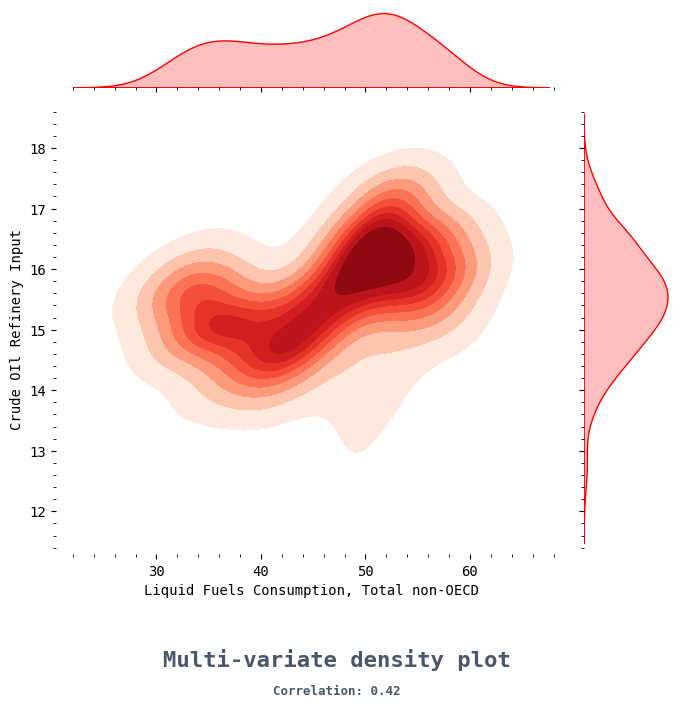

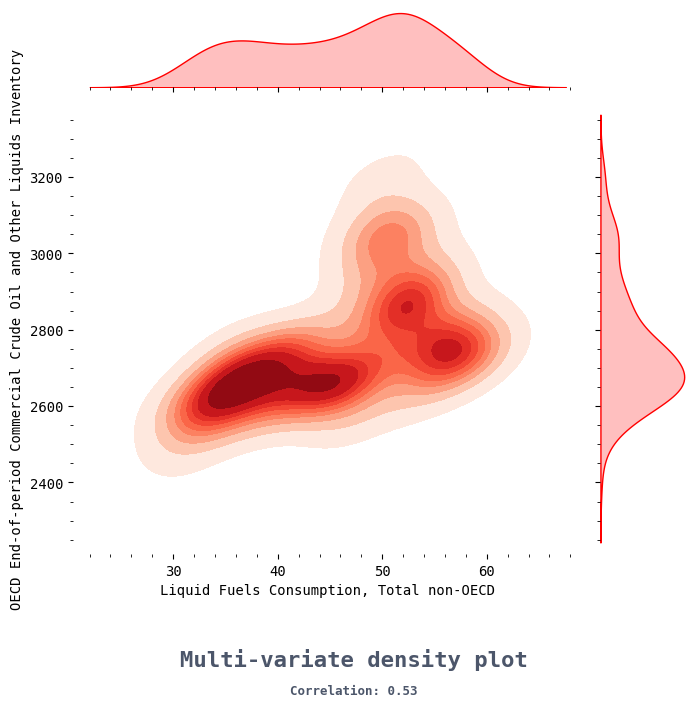

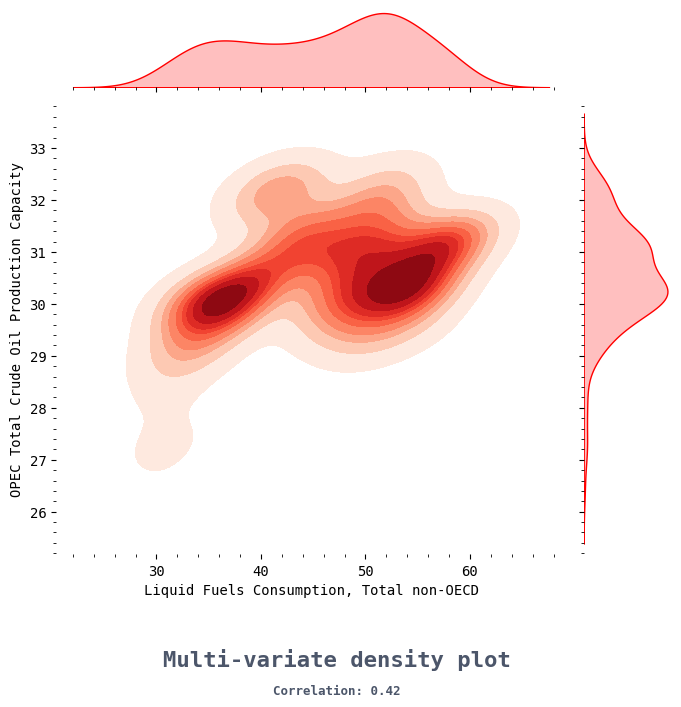

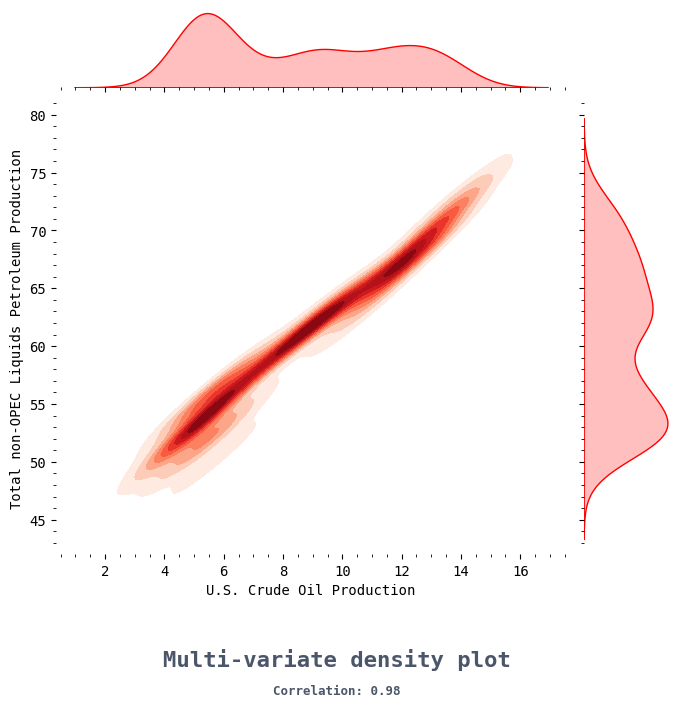

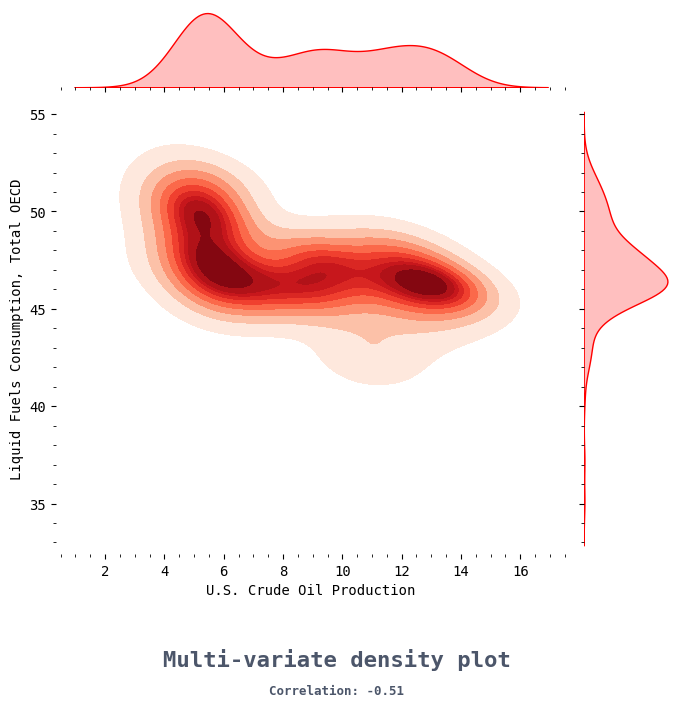

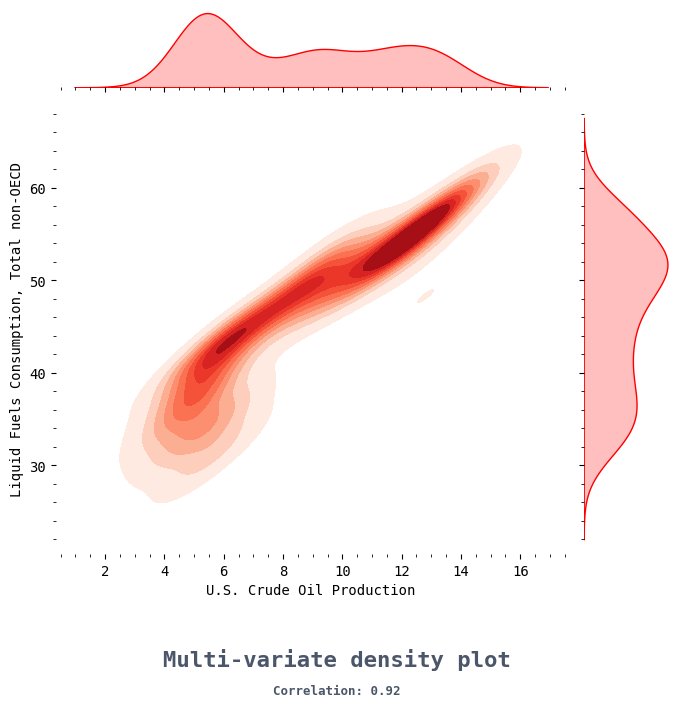

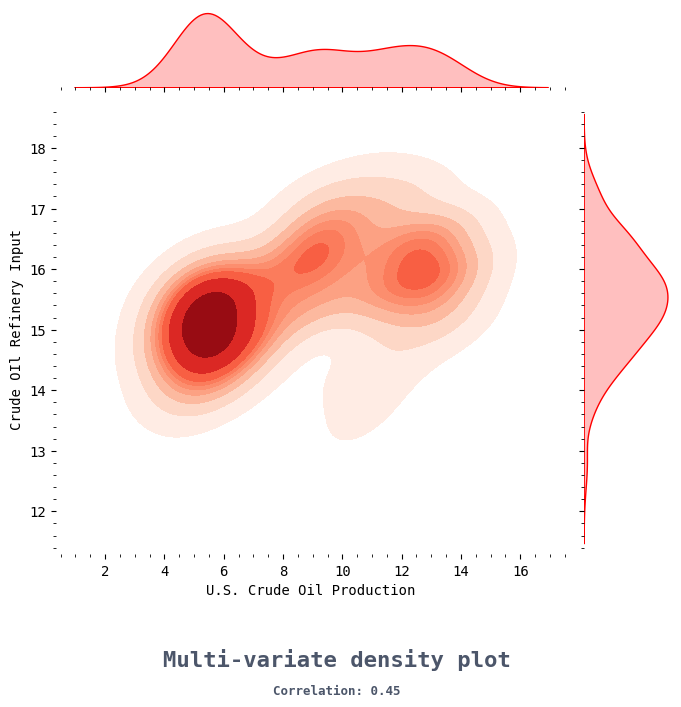

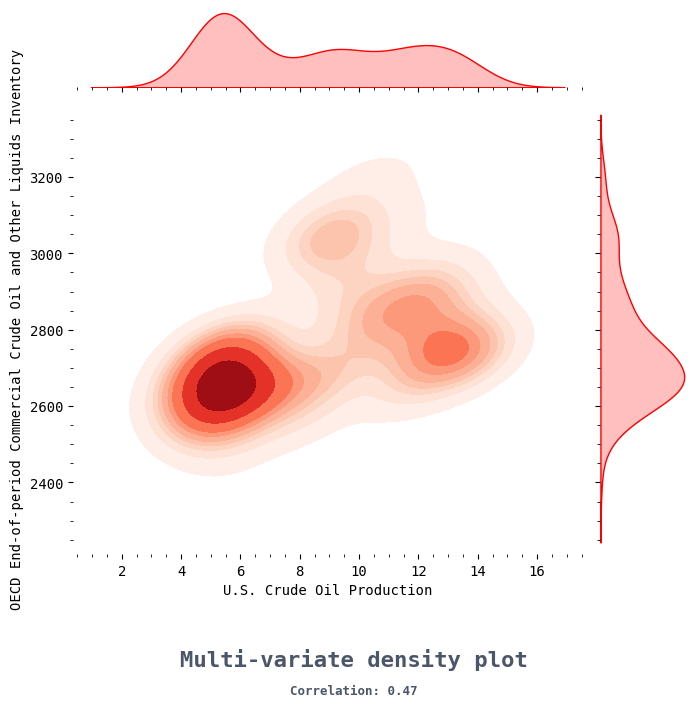

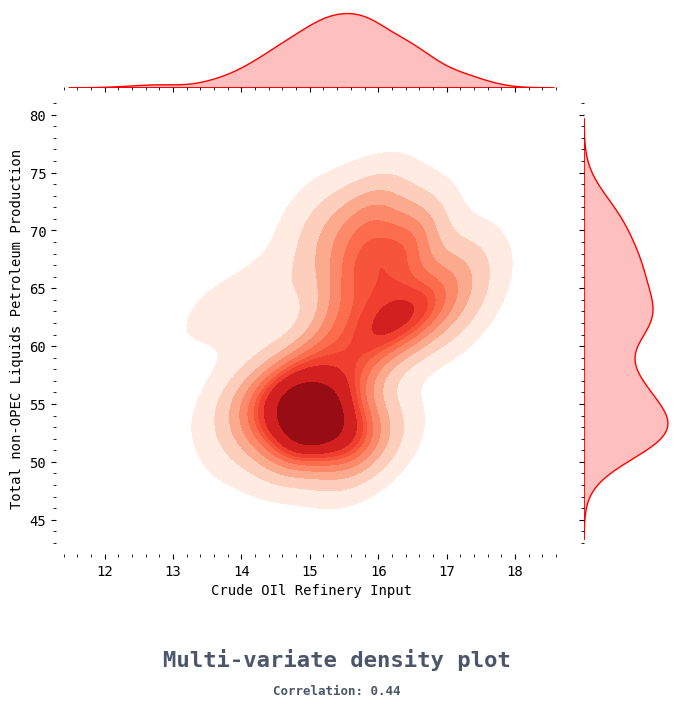

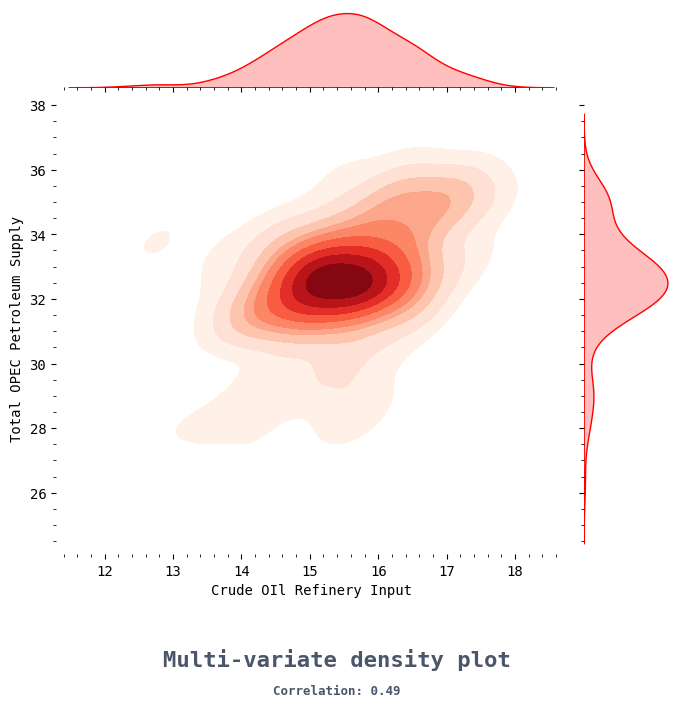

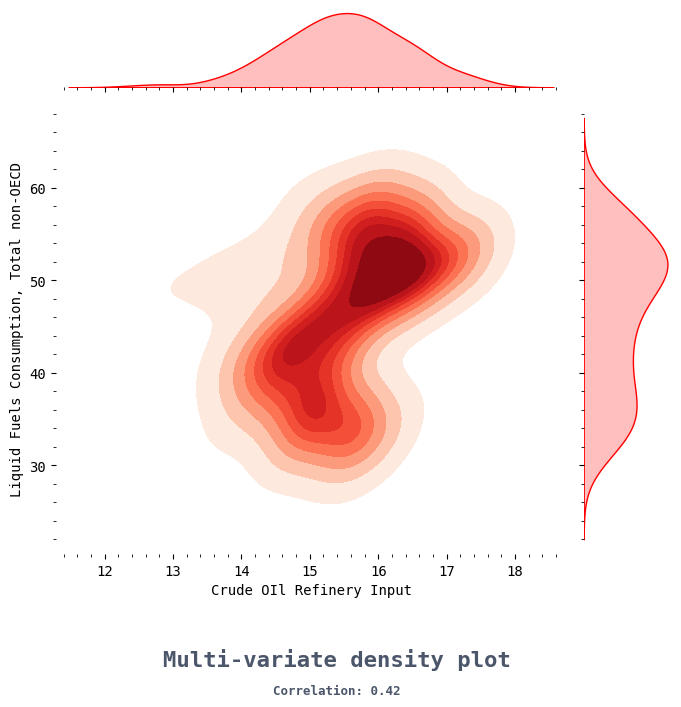

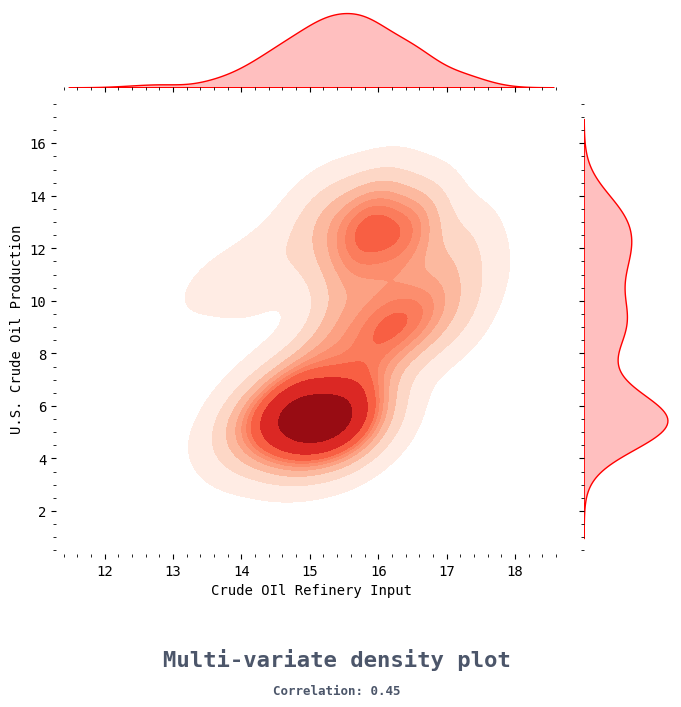

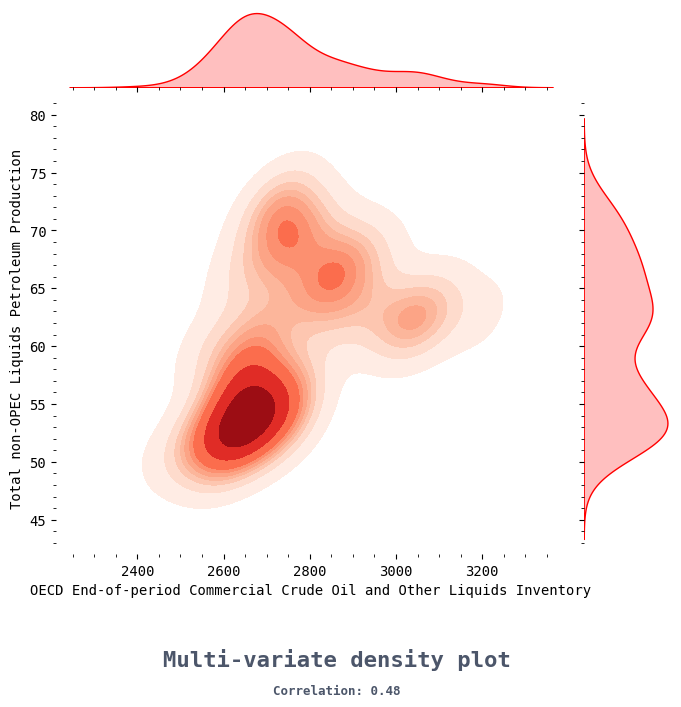

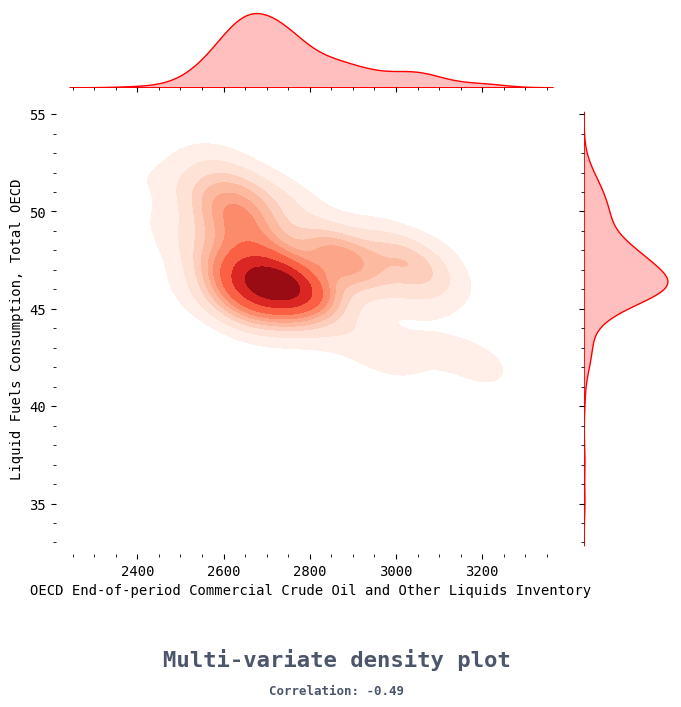

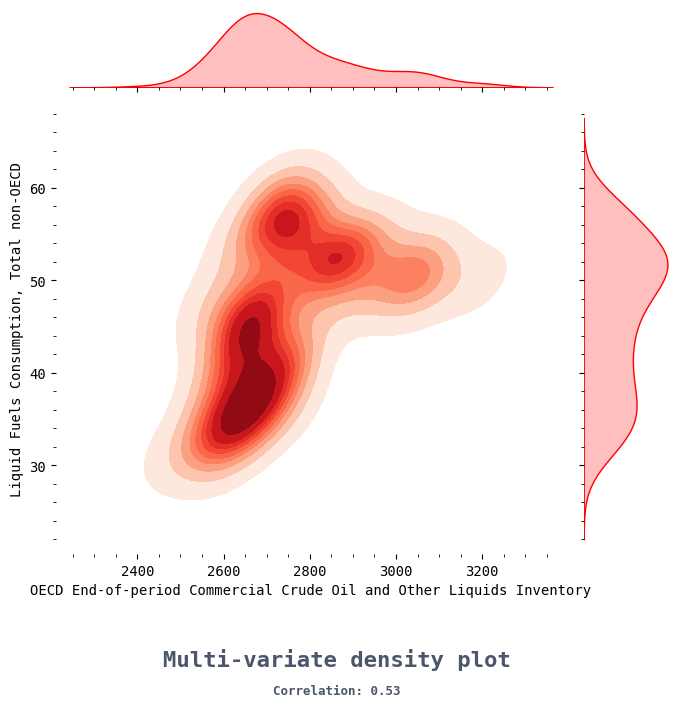

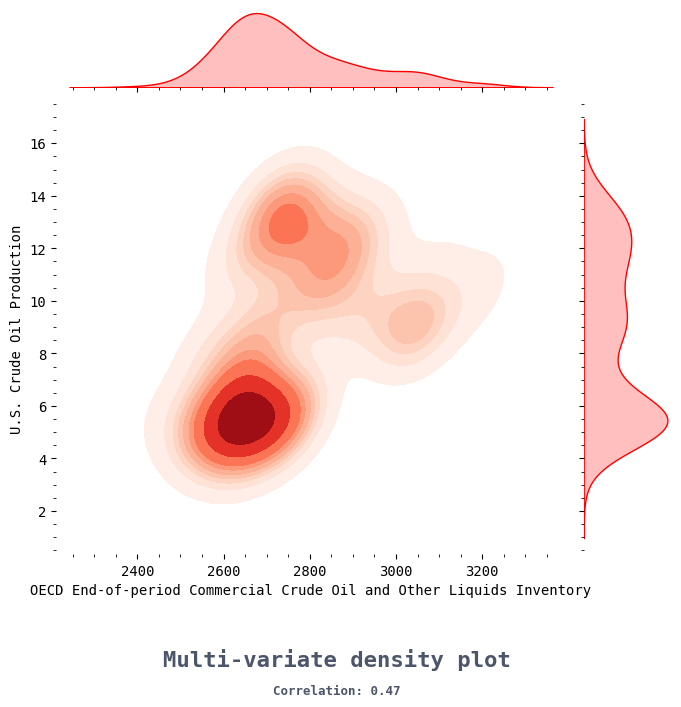

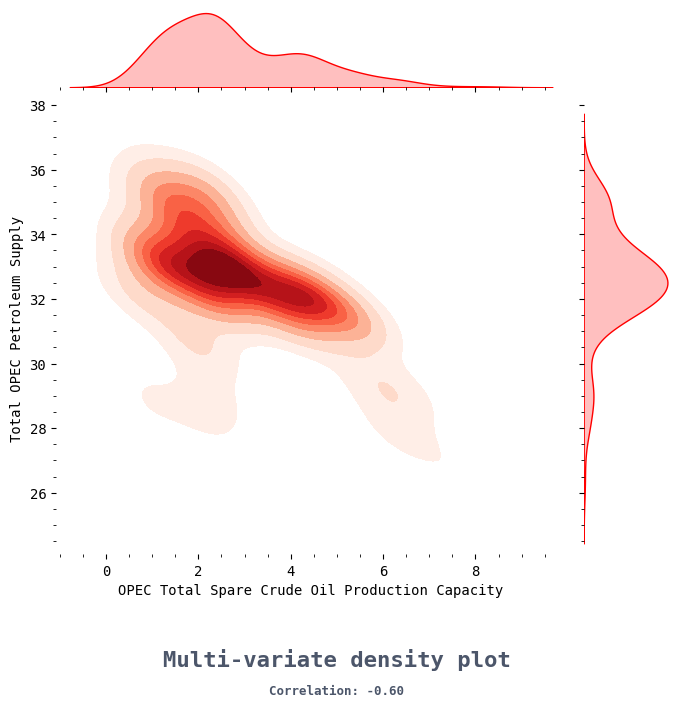

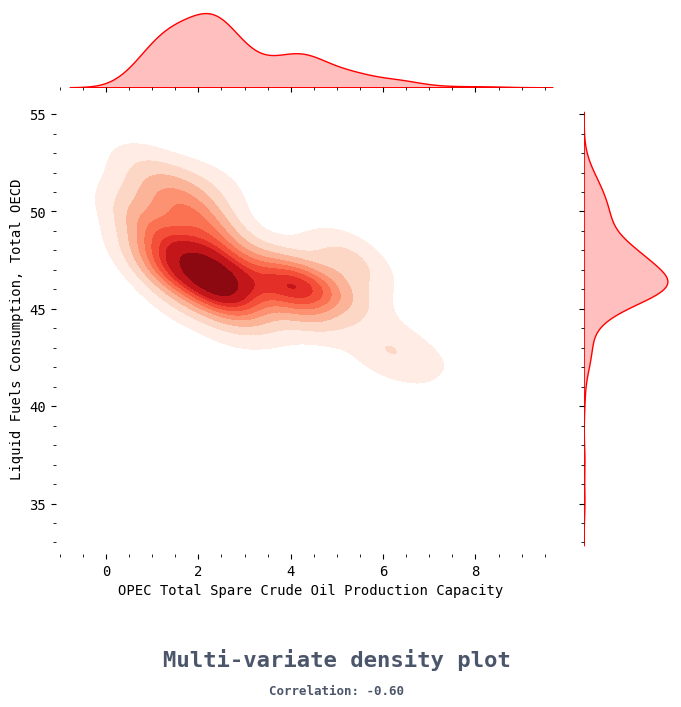

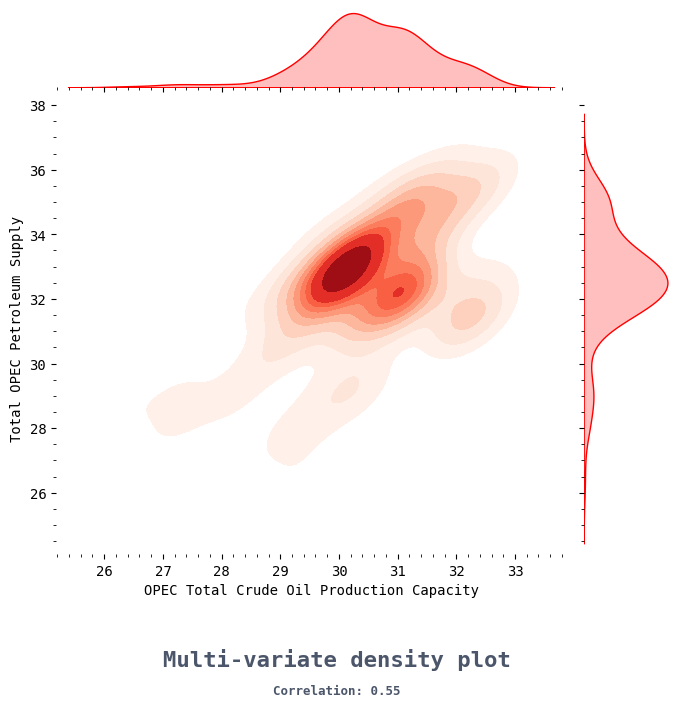

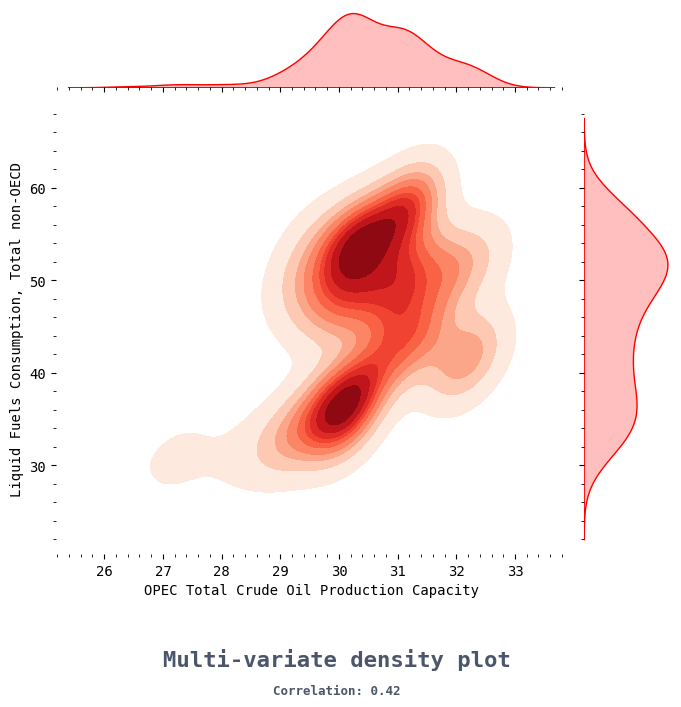

In [54]:
for col1, col2 in high_correlations:  
    multivariate_density(x=final_df[col1], y=final_df[col2], 
                     x_label=col1, y_label=col2, title="Multi-variate density plot").savefig(f"multivariate_plots/{col1}_{col2}.png")


